In [36]:
# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.computer_vision.ex5 import *

# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    '../input/car-or-truck/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    '../input/car-or-truck/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)


Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [37]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

model = keras.Sequential([
    # Block One
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),

    # Block Two
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Block Three
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid'),
])


In [38]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)


In [39]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

Finally, let's test the performance of this new model. First run this cell to fit the model to the training set.

In [40]:
history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
)

Epoch 1/50
80/80 [==============================] - 16s 190ms/step - loss: 0.6879 - binary_accuracy: 0.5587 - val_loss: 0.6691 - val_binary_accuracy: 0.5785
Epoch 2/50
80/80 [==============================] - 4s 51ms/step - loss: 0.6676 - binary_accuracy: 0.5748 - val_loss: 0.6612 - val_binary_accuracy: 0.5785
Epoch 3/50
80/80 [==============================] - 4s 51ms/step - loss: 0.6643 - binary_accuracy: 0.5748 - val_loss: 0.6505 - val_binary_accuracy: 0.5785
Epoch 4/50
80/80 [==============================] - 4s 51ms/step - loss: 0.6541 - binary_accuracy: 0.5748 - val_loss: 0.6450 - val_binary_accuracy: 0.5785
Epoch 5/50
80/80 [==============================] - 4s 51ms/step - loss: 0.6531 - binary_accuracy: 0.5841 - val_loss: 0.6383 - val_binary_accuracy: 0.6034
Epoch 6/50
80/80 [==============================] - 4s 51ms/step - loss: 0.6419 - binary_accuracy: 0.6249 - val_loss: 0.6342 - val_binary_accuracy: 0.5947
Epoch 7/50
80/80 [==============================] - 4s 51ms/step - l

And now run the cell below to plot the loss and metric curves for this training run.

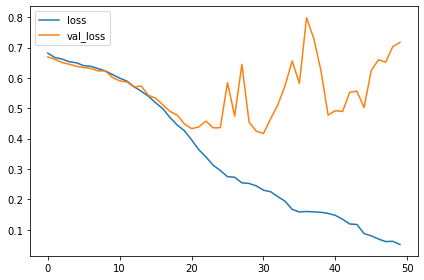

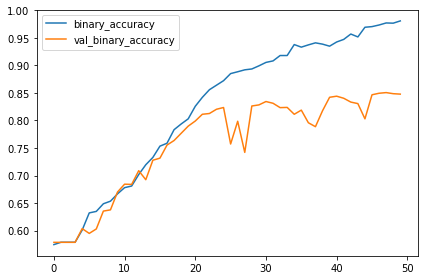

In [41]:
import pandas as pd
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();